# [Predict Hourly Wage](https://www.kaggle.com/c/predicthourlywage/data)

# Data Exploration

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train_df = pd.read_csv("../../mltestdata/Income_training.csv")
test_df = pd.read_csv("../../mltestdata/Income_testing.csv")
combine = [train_df, test_df]

In [3]:
train_df.head()

,compositeHourlyWages,age,yearsEducation,sex1M0F
0,21.38,58,10,1
1,25.15,42,16,1
2,8.57,31,12,0
3,12.07,43,13,0
4,10.97,46,12,0


Features:
- ID - employee's id
- compositeHourlyWages - Weighted average of employee's hourly wage.
- age - the age of the employee
- yearsEducation - Number of years educated
- sex1M0F - Sex (1 for Male, 0 for Female)

In [4]:
train_df.isnull().any()

compositeHourlyWages    False
age                     False
yearsEducation          False
sex1M0F                 False
dtype: bool

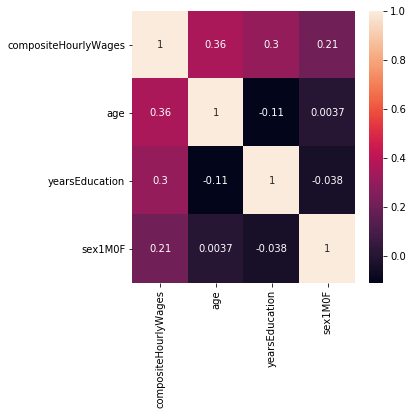

In [5]:
# Check values
#print(train_df.yearsEducation.value_counts())
# Check Correlation Coefficient 
plt.figure(figsize=(5,5))
sns.heatmap(train_df[['compositeHourlyWages','age','yearsEducation','sex1M0F']].corr(), annot=True)

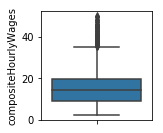

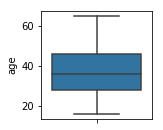

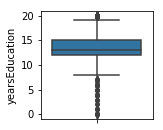

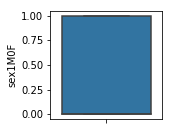

In [6]:
# Check outliers
for column in train_df.columns:
    fig = plt.figure(figsize=(2,2))
    ax = sns.boxplot(y=column, data=train_df)

In [7]:
# Check outliers
train_df.describe()

,compositeHourlyWages,age,yearsEducation,sex1M0F
count,3197.000000,3197.000000,3197.000000,3197.000000
mean,15.495127,36.884579,13.180794,0.491711
std,7.754763,11.996980,3.042127,0.500009
min,2.300000,16.000000,0.000000,0.000000
25%,9.250000,28.000000,12.000000,0.000000
50%,14.210000,36.000000,13.000000,0.000000
75%,19.650000,46.000000,15.000000,1.000000
max,49.920000,65.000000,20.000000,1.000000


In [8]:
# pivot
# それぞれ四分位に分けてみて関連を見てみる。
# Mapping features

tdf = train_df.copy()

tdf.loc[ tdf['compositeHourlyWages'] <= 9.25, 'compositeHourlyWages']                           = 0
tdf.loc[(tdf['compositeHourlyWages'] > 9.25) & (tdf['compositeHourlyWages'] <= 14.21), 'compositeHourlyWages']  = 1
tdf.loc[(tdf['compositeHourlyWages'] > 14.21) & (tdf['compositeHourlyWages'] <= 19.65), 'compositeHourlyWages'] = 2
tdf.loc[ tdf['compositeHourlyWages'] > 19.65, 'compositeHourlyWages']                           = 3
tdf['compositeHourlyWages'] = tdf['compositeHourlyWages'].astype(int)

#tdf.head()

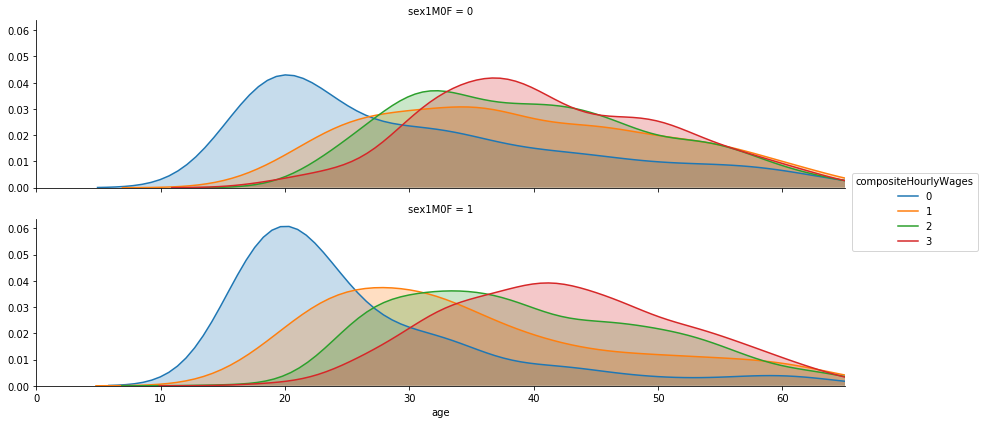

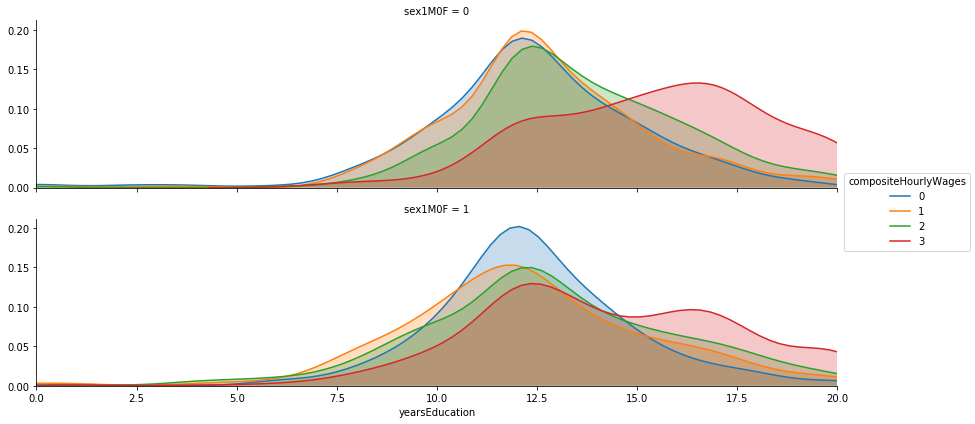

In [9]:
def plot_distribution( df , var , target , **kwargs ):
    row = kwargs.get( 'row' , None )
    col = kwargs.get( 'col' , None )
    facet = sns.FacetGrid( df , hue=target , aspect=4 , row = row , col = col )
    facet.map( sns.kdeplot , var , shade= True )
    facet.set( xlim=( 0 , df[ var ].max() ) )
    facet.add_legend()

plot_distribution( tdf , var = 'age' , target = 'compositeHourlyWages' , row = 'sex1M0F' )
plot_distribution( tdf , var = 'yearsEducation' , target = 'compositeHourlyWages' , row = 'sex1M0F' )

In [10]:
train = train_df
test = test_df

from scipy.stats import norm
from scipy import stats
import numpy as np


 mu = 15.50 and sigma = 7.75



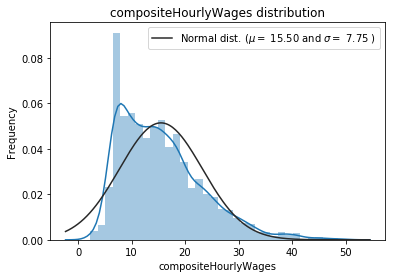

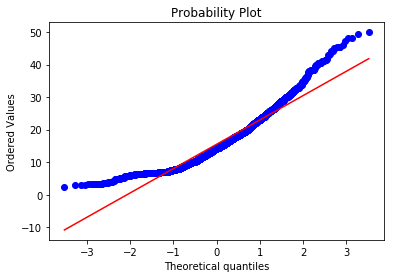

In [11]:
# ヒストグラムとカーネル密度推定による確率密度関数
# fitを使えば分布のフィッティングもできる
sns.distplot(train['compositeHourlyWages'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train['compositeHourlyWages'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('compositeHourlyWages distribution')

#Get also the QQ-plot
# > X軸上に観測した累積パーセント、Y軸上に期待累積パーセントを持つグラフ
# > ヒストグラムよりなじみは薄いと思うので、わからなければ 一直線上になっていれば正規分布であるくらいに覚えておけばOK
fig = plt.figure()
res = stats.probplot(train['compositeHourlyWages'], plot=plt)
plt.show()


 mu = 2.70 and sigma = 0.46



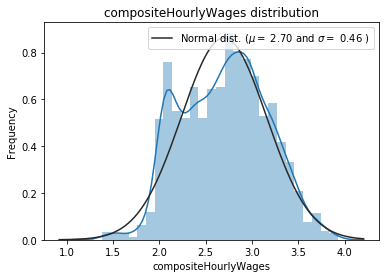

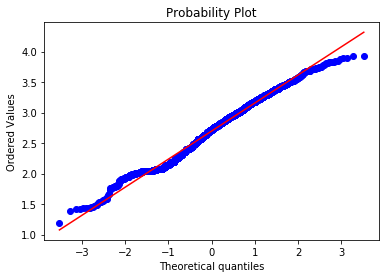

In [12]:
#We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
train["compositeHourlyWages"] = np.log1p(train["compositeHourlyWages"])

#Check the new distribution 
sns.distplot(train['compositeHourlyWages'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train['compositeHourlyWages'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('compositeHourlyWages distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(train['compositeHourlyWages'], plot=plt)
plt.show()

- NaN: No
- Corr: Not big value among features.
- Outliers: Think there is no outliers.
- Distribution: The older age is and longer education is, the higher salary is

# Preprocessing

In [13]:
train.columns

Index(['compositeHourlyWages', 'age', 'yearsEducation', 'sex1M0F'], dtype='object')

In [14]:
test.columns

Index(['ID', 'age', 'yearsEducation', 'sex1M0F'], dtype='object')

In [15]:
train_target = train.compositeHourlyWages.values

#Save the 'ID' column
test_ID = test['ID']

#Now drop the  'ID' colum since it's unnecessary for  the prediction process.
test.drop("ID", axis = 1, inplace = True)

train.drop(['compositeHourlyWages'], axis=1, inplace=True)

# Modeling

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train,train_target,test_size=0.2,random_state=0)

In [ ]:
from sklearn.svm import SVR
import numpy as np

svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
svr_lin = SVR(kernel='linear', C=1e3)
svr_poly = SVR(kernel='poly', C=1e3, degree=2)
y_rbf = svr_rbf.fit(X_train, y_train).predict(X_test)
y_lin = svr_lin.fit(X_train, y_train).predict(X_test)
y_poly = svr_poly.fit(X_train, y_train).predict(X_test)

In [172]:
clf.score(X_test, y_test)

0.012704252594499366

In [173]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf,X_test, y_test)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() / 2))

Accuracy: -1.64 (+/- 0.36)


In [174]:
y_pred = clf.predict(X_test)

## Base models

In [64]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb

import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn #ignore annoying warning (from sklearn and seaborn)

In [71]:
#Validation function
n_folds = 5

#平均二乗誤差 RMSE(Root Mean Square Error)
def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train.values)
    rmse= np.sqrt(-cross_val_score(model, train.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

In [72]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1, 
                             seed =7,
                             nthread = -1)
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

In [68]:
score = rmsle_cv(lasso)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

score = rmsle_cv(ENet)
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

score = rmsle_cv(KRR)
print("Kernel Ridge score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

score = rmsle_cv(GBoost)
print("Gradient Boosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

score = rmsle_cv(model_xgb)
print("Xgboost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

score = rmsle_cv(model_lgb)
print("LGBM score: {:.4f} ({:.4f})\n" .format(score.mean(), score.std()))


Lasso score: 0.1058 (0.0042)

ElasticNet score: 0.1058 (0.0042)

Kernel Ridge score: 0.0988 (0.0040)

Gradient Boosting score: 0.1032 (0.0032)

Xgboost score: 0.0998 (0.0045)

LGBM score: 1.3058 (0.0043)



## Stacking  models

In [75]:
class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models
        
    # we define clones of the original models to fit the data in
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        
        # Train cloned base models
        for model in self.models_:
            model.fit(X, y)

        return self
    
    #Now we do the predictions for cloned models and average them
    def predict(self, X):
        predictions = np.column_stack([
            model.predict(X) for model in self.models_
        ])
        return np.mean(predictions, axis=1) 

In [76]:
averaged_models = AveragingModels(models = (ENet, GBoost, KRR, lasso))

score = rmsle_cv(averaged_models)
print(" Averaged base models score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

 Averaged base models score: 0.1004 (0.0040)



In [79]:
class StackingAveragedModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, base_models, meta_model, n_folds=5):
        self.base_models = base_models
        self.meta_model = meta_model
        self.n_folds = n_folds
   
    # We again fit the data on clones of the original models
    def fit(self, X, y):
        self.base_models_ = [list() for x in self.base_models]
        self.meta_model_ = clone(self.meta_model)
        kfold = KFold(n_splits=self.n_folds, shuffle=True, random_state=156)
        
        # Train cloned base models then create out-of-fold predictions
        # that are needed to train the cloned meta-model
        out_of_fold_predictions = np.zeros((X.shape[0], len(self.base_models)))
        for i, model in enumerate(self.base_models):
            for train_index, holdout_index in kfold.split(X, y):
                instance = clone(model)
                self.base_models_[i].append(instance)
                instance.fit(X[train_index], y[train_index])
                y_pred = instance.predict(X[holdout_index])
                out_of_fold_predictions[holdout_index, i] = y_pred
                
        # Now train the cloned  meta-model using the out-of-fold predictions as new feature
        self.meta_model_.fit(out_of_fold_predictions, y)
        return self
   
    #Do the predictions of all base models on the test data and use the averaged predictions as 
    #meta-features for the final prediction which is done by the meta-model
    def predict(self, X):
        meta_features = np.column_stack([
            np.column_stack([model.predict(X) for model in base_models]).mean(axis=1)
            for base_models in self.base_models_ ])
        return self.meta_model_.predict(meta_features)

In [80]:
stacked_averaged_models = StackingAveragedModels(base_models = (ENet, GBoost, KRR),
                                                 meta_model = lasso)

score = rmsle_cv(stacked_averaged_models)
print("Stacking Averaged models score: {:.4f} ({:.4f})".format(score.mean(), score.std()))

Stacking Averaged models score: 0.0986 (0.0040)


In [81]:
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

In [82]:
stacked_averaged_models.fit(train.values, y_train)
stacked_train_pred = stacked_averaged_models.predict(train.values)
stacked_pred = np.expm1(stacked_averaged_models.predict(test.values))
print(rmsle(y_train, stacked_train_pred))

0.0968245678459


In [83]:
model_xgb.fit(train, y_train)
xgb_train_pred = model_xgb.predict(train)
xgb_pred = np.expm1(model_xgb.predict(test))
print(rmsle(y_train, xgb_train_pred))

0.0986544725683


In [84]:
model_lgb.fit(train, y_train)
lgb_train_pred = model_lgb.predict(train)
lgb_pred = np.expm1(model_lgb.predict(test.values))
print(rmsle(y_train, lgb_train_pred))

1.30580646761


In [85]:
'''RMSE on the entire Train data when averaging'''

print('RMSLE score on train data:')
print(rmsle(y_train,stacked_train_pred*0.70 +
               xgb_train_pred*0.15 + lgb_train_pred*0.15 ))

RMSLE score on train data:
0.218260778213


In [86]:
ensemble = stacked_pred*0.70 + xgb_pred*0.15 + lgb_pred*0.15

In [87]:
sub = pd.DataFrame()
sub['ID'] = test_ID
sub['compositeHourlyWages'] = ensemble
sub.to_csv('submission.csv',index=False)